In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import matplotlib.pyplot as plt
import os

from data.mnist_novelty import MNIST_OneClass
from data.cifar_novelty import Cifar10_OneClass
from hugeica import *

from torchvision.transforms import transforms
from sklearn.metrics import roc_auc_score

np.random.seed(252525)
torch.manual_seed(252525)


### Videos

Files already downloaded and verified
Files already downloaded and verified
Cifar10_OneClass(z_normalize=False, train_classes=[0], test_classes=[1, 2, 3, 4, 5, 6, 7, 8, 9], data_train=(5000, 3072), data_test_inliers=(1000, 3072), data_test_outliers=(1000, 3072))
# Fit SpatialICA(kaiser).
# Fit HugeICA((20000, 2700, 2700), device='cuda')
# Re-Fit SpatialICA(191).
# Fit HugeICA((20000, 2700, 191), device='cuda')
# Compute ICA metrics.
# Fit SFA(191).
# Fit HugeICA((20000, 191, 191), device='cuda')
# Update the independent components


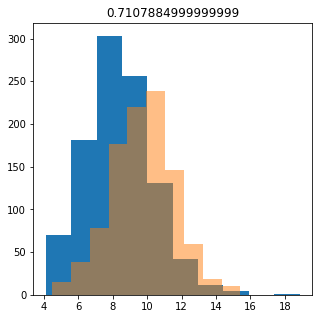

10.25102095509314

In [62]:
def preprocess(X, X_in, X_out, norm_contrast=True, DC=True, channels=None):
    
    #DEQUANTIZE
    X_, _ = dequantize(X) 
    
    # CONTRAST
    if norm_contrast:
        X_, _ = to_norm_contrast(X_, DC=DC, channels=channels)
    mean, std = np.zeros(X_.mean(0).shape), X_.std()

    # SCALE
    X_, _ = scale(X_, mean, std)
    
    X_in_, _ = dequantize(X_in)
    if norm_contrast:
        X_in_, _ = to_norm_contrast(X_in_, DC=DC, channels=channels)
    X_in_, _ = scale(X_in_, mean, std)

    X_out_, _ = dequantize(X_out)
    if norm_contrast:
        X_out_, _ = to_norm_contrast(X_out_, DC=DC, channels=channels)
    
    X_out_, _ = scale(X_out_, mean, std)
    return X_, X_in_, X_out_, mean, std


for j, clazz in enumerate(range(0,1)):

    test_classes = [0,1,2,3,4,5,6,7,8,9]
    test_classes.remove(clazz)
    shape = (3, 32, 32)
    trans = [transforms.ToTensor()]
    
    np.random.seed(32)
    X_, X_valid_, X_test_ = Cifar10_OneClass(train_classes=[clazz], test_classes=test_classes, z_normalize=False, balance=True, transform=transforms.Compose(trans))[0]

    X__, X_valid__, X_test__, mean, std = preprocess(X_, X_valid_, X_test_, True, DC=True, channels=1)
    
    model = SFA(shape=(3,32,32), 
               BSZ=(30, 30), 
               stride=2, 
               n_components="kaiser",
               mode="slow",
               remove_components=30,
               ica=False)
    model.fit(X__, 1, bs=10000, logging=-1, lr=1e-4)

plt.rcParams["figure.figsize"] = (5,5)   

S_in = np.linalg.norm(model.transform(X_valid__, agg="mean"), axis=1)
S_out = np.linalg.norm(model.transform(X_test__, agg="mean"), axis=1)
plt.hist(S_in)
plt.hist(S_out, alpha=0.5)
auc = roc_auc_score([0] * len(X_valid__) + [1] * len(X_test__), np.concatenate([S_in, S_out])) 
plt.title(auc)
plt.show()

kurt(model.model.mixing_matrix.flatten())

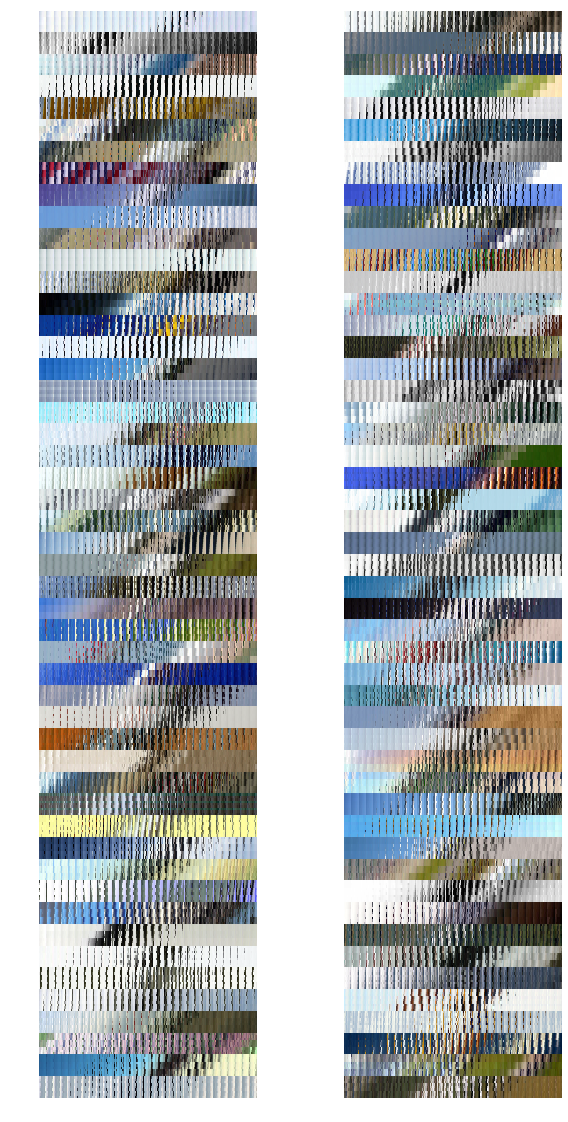

In [29]:
patches = im2col(X__.reshape(-1, 3, 32, 32), BSZ=(30, 30)).T
patches = patches[im2colOrder(N=len(X__), p=len(patches))]
plt.rcParams["figure.figsize"] = (10,20)
video = patches.reshape(-1, 3, 30*30).transpose(0, 2, 1)
video = (video - video.min(1, keepdims=True)) / (video.max(1, keepdims=True) - video.min(1, keepdims=True))
video = np.repeat(video, axis=0, repeats=10)
bs = 4500
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(video[i*bs:(i+1)*bs])
    plt.axis("off")

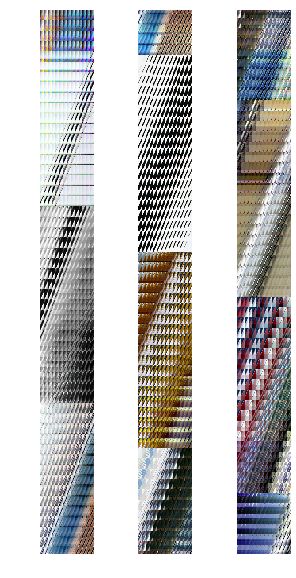

In [16]:
patches = im2col(X__.reshape(-1, 3, 32, 32), BSZ=(14, 14)).T
patches = patches[im2colOrder(N=len(X__), p=len(patches))]

plt.rcParams["figure.figsize"] = (5,10)

blocks = 3
bs = 2000 
max_n = bs * blocks

video = patches.reshape(-1, 3, 14*14).transpose(0, 2, 1)[:max_n]
video = (video - video.min(1, keepdims=True)) / (video.max(1, keepdims=True) - video.min(1, keepdims=True))
video = np.repeat(video, axis=0, repeats=2)
for i in range(blocks):
    plt.subplot(1, blocks, i+1)
    plt.imshow(video[i*bs:(i+1)*bs])
    plt.axis("off")

# Fit SpatialICA(kaiser).
# Fit HugeICA((20000, 2700, 2700), device='cuda')
# Re-Fit SpatialICA(191).
# Fit HugeICA((20000, 2700, 191), device='cuda')
# Compute ICA metrics.
# Fit SFA(191).
# Fit HugeICA((20000, 191, 191), device='cuda')
# Update the independent components
# Fit SpatialICA(kaiser).
# Fit HugeICA((180000, 1452, 1452), device='cuda')
# Re-Fit SpatialICA(127).
# Fit HugeICA((180000, 1452, 127), device='cuda')
# Compute ICA metrics.
# Fit SFA(127).
# Fit HugeICA((180000, 127, 127), device='cuda')
# Update the independent components
# Fit SpatialICA(kaiser).
# Fit HugeICA((500000, 588, 588), device='cuda')
# Re-Fit SpatialICA(56).
# Fit HugeICA((500000, 588, 56), device='cuda')
# Compute ICA metrics.
# Fit SFA(56).
# Fit HugeICA((500000, 56, 56), device='cuda')
# Update the independent components


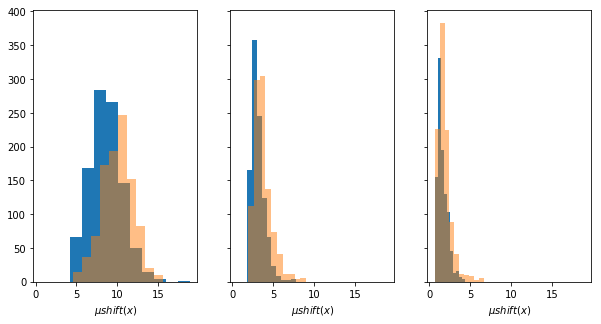

In [83]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)
plt.rcParams["figure.figsize"] = (5,10)

model = SFA(shape=(3,32,32), 
           BSZ=(30, 30), 
           stride=2, 
           n_components="kaiser",
           mode="slow",
           remove_components=0,
           ica=False)
model.fit(X__, 1, bs=10000, logging=-1, lr=1e-4)

S_in = np.linalg.norm(model.transform(X_valid__, agg="mean"), axis=1)
S_out = np.linalg.norm(model.transform(X_test__, agg="mean"), axis=1)


ax1.hist(S_in)
ax1.hist(S_out, alpha=0.5)
auc = roc_auc_score([0] * len(X_valid__) + [1] * len(X_test__), np.concatenate([S_in, S_out])) 
#plt.title(auc)
ax1.set_xlabel("$\mu shift(x)$")

model = SFA(shape=(3,32,32), 
           BSZ=(22, 22), 
           stride=2, 
           n_components="kaiser",
           mode="slow",
           remove_components=0,
           ica=False)
model.fit(X__, 1, bs=10000, logging=-1, lr=1e-4)

S_in = np.linalg.norm(model.transform(X_valid__, agg="mean"), axis=1)
S_out = np.linalg.norm(model.transform(X_test__, agg="mean"), axis=1)
ax2.hist(S_in)
ax2.hist(S_out, alpha=0.5)
auc = roc_auc_score([0] * len(X_valid__) + [1] * len(X_test__), np.concatenate([S_in, S_out])) 
#plt.title(auc)
ax2.set_xlabel("$\mu shift(x)$")


model = SFA(shape=(3,32,32), 
           BSZ=(14, 14), 
           stride=2, 
           n_components="kaiser",
           mode="slow",
           remove_components=0,
           ica=False)
model.fit(X__, 1, bs=10000, logging=-1, lr=1e-4)

S_in = np.linalg.norm(model.transform(X_valid__, agg="mean"), axis=1)
S_out = np.linalg.norm(model.transform(X_test__, agg="mean"), axis=1)
ax3.hist(S_in)
ax3.hist(S_out, alpha=0.5)
auc = roc_auc_score([0] * len(X_valid__) + [1] * len(X_test__), np.concatenate([S_in, S_out])) 
#plt.title(auc)
ax3.set_xlabel("$\mu shift(x)$")

matplotlib2tikz.save("CIFAR_ship_score_variance.tex")

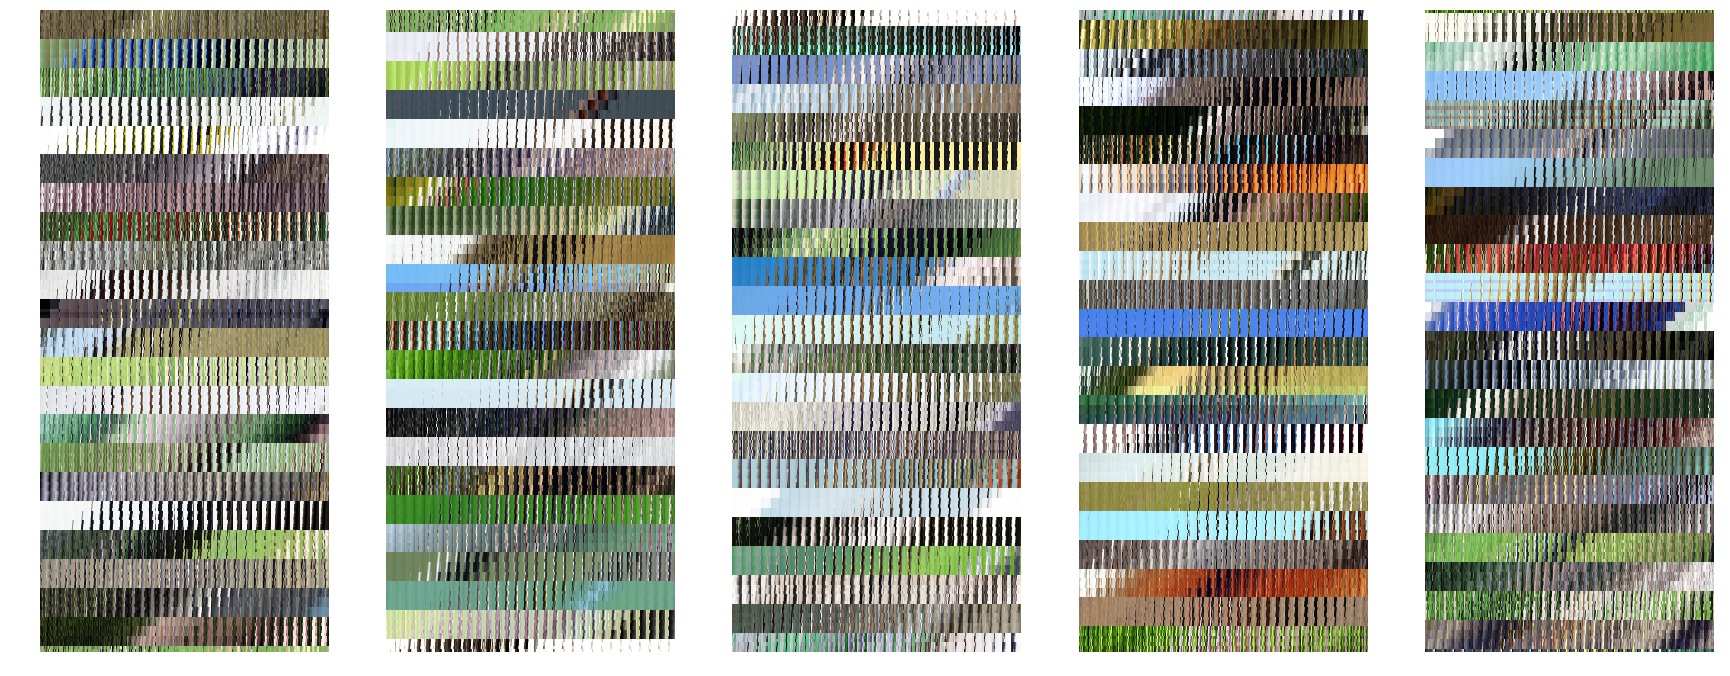

In [767]:
patches = im2col(X__.reshape(-1, 3, 32, 32), BSZ=(30, 30)).T
patches = patches[im2colOrder(N=len(X__), p=len(patches))]
plt.rcParams["figure.figsize"] = (30,20)
video = patches.reshape(-1, 3, 30*30).transpose(0, 2, 1)
video = (video - video.min(1, keepdims=True)) / (video.max(1, keepdims=True) - video.min(1, keepdims=True))
video = np.repeat(video, axis=0, repeats=10)
bs = 2000
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(video[i*bs:(i+1)*bs])
    plt.axis("off")

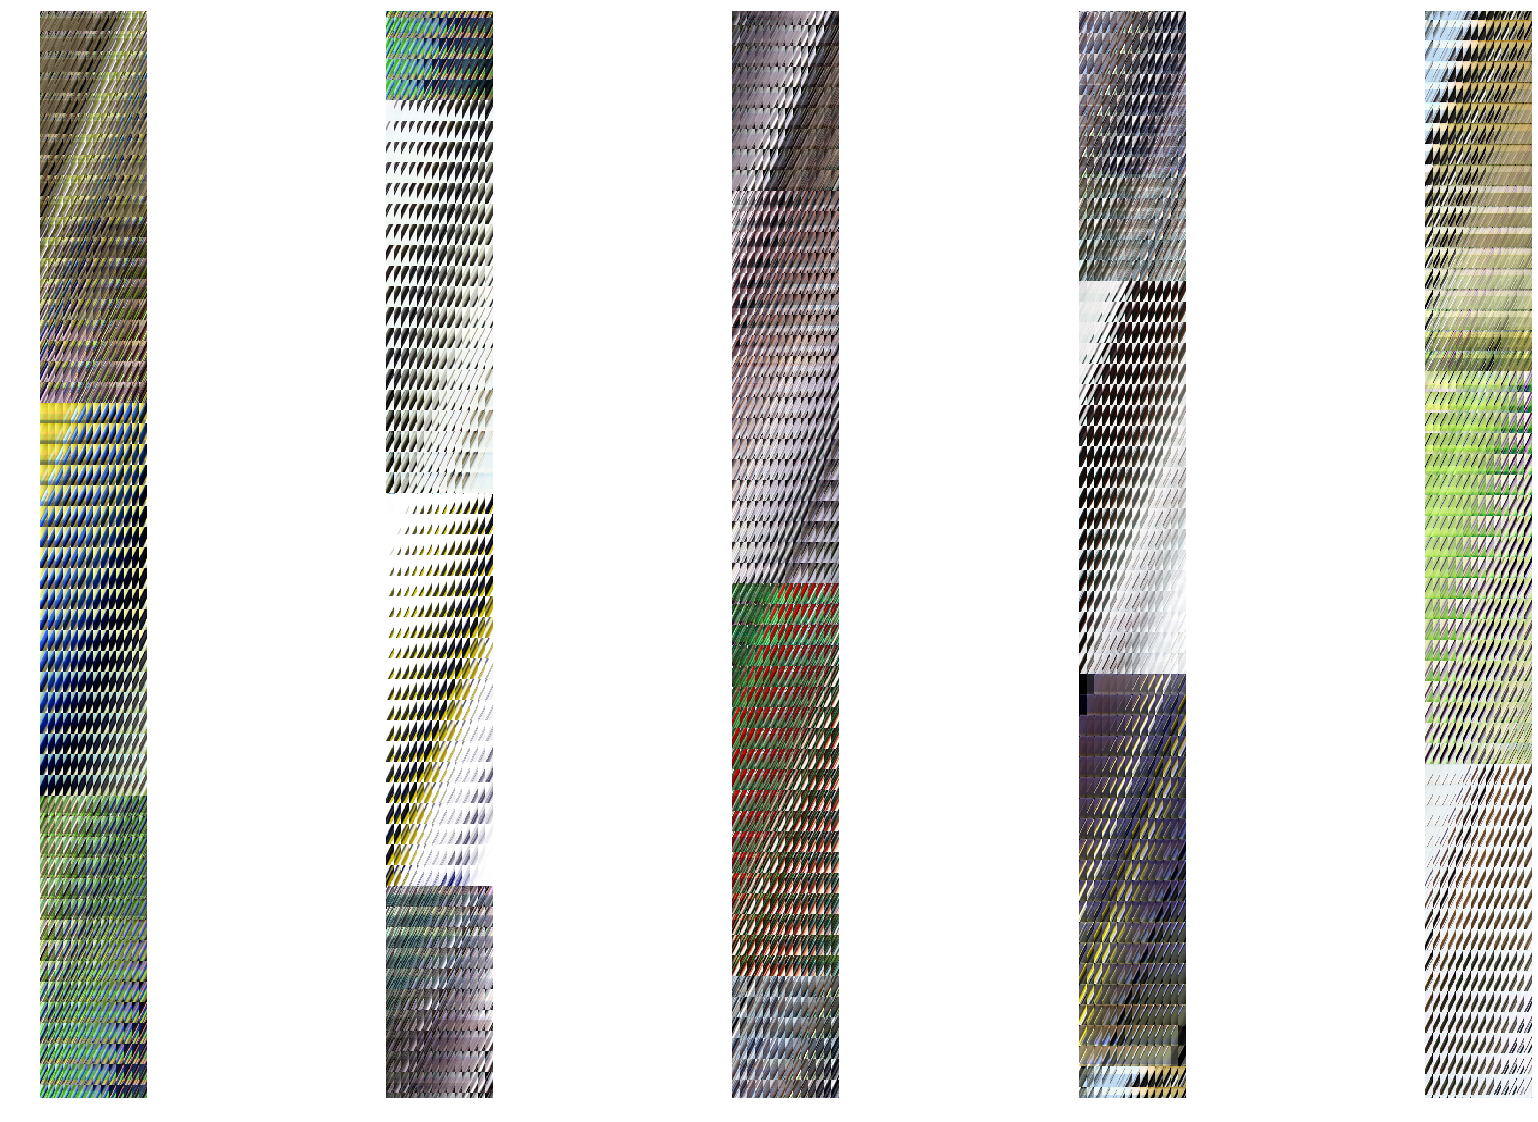

In [768]:
patches = im2col(X__.reshape(-1, 3, 32, 32), BSZ=(14, 14)).T
patches = patches[im2colOrder(N=len(X__), p=len(patches))]

plt.rcParams["figure.figsize"] = (30,20)

blocks = 5
bs = 2000 
max_n = bs * blocks

video = patches.reshape(-1, 3, 14*14).transpose(0, 2, 1)[:max_n]
video = (video - video.min(1, keepdims=True)) / (video.max(1, keepdims=True) - video.min(1, keepdims=True))
video = np.repeat(video, axis=0, repeats=2)
for i in range(blocks):
    plt.subplot(1, blocks, i+1)
    plt.imshow(video[i*bs:(i+1)*bs])
    plt.axis("off")

### Grid search

In [36]:
log_full = []
for clazz in range(0,10):

    test_classes = [0,1,2,3,4,5,6,7,8,9]
    test_classes.remove(clazz)
    shape = (3, 32, 32)
    trans = [transforms.ToTensor()]
    
    np.random.seed(32)
    X_, X_valid_, X_test_ = Cifar10_OneClass(train_classes=[clazz], test_classes=test_classes, z_normalize=False, balance=True, transform=transforms.Compose(trans))[0]

    hyp2 = SFA.hyperparameter_search(X_, X_valid_, X_test_, 
                      patch_size=range(12,31,2),
                      n_components=["q90"], 
                      stride=[2], 
                      shape=(3,32,32), 
                      bs=10000, 
                      lr=1e-4,
                      epochs=20,
                      norm=[2],
                      mode="ta",
                      max_components=256,
                      remove_components=[0],
                      use_conv=False,
                      logging=1, 
                      aucs=["mean", "sum"]) 
    log_full.append(hyp2)
    print(clazz)
    
concat = pd.concat(log_full)
concat["class"] = np.repeat(np.arange(len(log_full)), len(log_full[0]))
concat.to_csv(f"./experiments/cifar10_hyperparameter_search_q90_ta.csv")

Files already downloaded and verified
Files already downloaded and verified
 28%|██▊       | 7/25 [09:38<24:48, 82.70s/it]
Cifar10_OneClass(z_normalize=False, train_classes=[0], test_classes=[1, 2, 3, 4, 5, 6, 7, 8, 9], data_train=(5000, 3072), data_test_inliers=(1000, 3072), data_test_outliers=(1000, 3072))
# Fit SpatialICA(q90).
# Fit HugeICA((605242, 432, 256), device='cuda')
 98%|█████████▊| 60/61 [00:10<00:00,  5.92it/s]
Ep.  0 - -0.9901 - validation (loss/white/kurt/mi/logp): -1.0053 / 0.02 / 7.81 / 1.4194 / 0.3158 (eval took: 0.1s)
# Re-Fit SpatialICA(29).
# Fit HugeICA((605242, 432, 29), device='cuda')
 98%|█████████▊| 60/61 [00:09<00:00,  6.15it/s]
Ep.  0 - -0.9702 - validation (loss/white/kurt/mi/logp): -0.9852 / 0.03 / 2.44 / 0.0457 / 0.3707 (eval took: 0.0s)
Ep.  1 - -0.9847 - validation (loss/white/kurt/mi/logp): -0.9852 / 0.03 / 2.41 / 0.0447 / 0.3707 (eval took: 0.0s)
Ep.  2 - -0.9848 - validation (loss/white/kurt/mi/logp): -0.9853 / 0.03 / 2.41 / 0.0450 / 0.3705 (eval t

Ep. 11 - -0.9863 - validation (loss/white/kurt/mi/logp): -0.9863 / 0.03 / 1.84 / 0.0500 / 0.3794 (eval took: 0.0s)
Ep. 12 - -0.9863 - validation (loss/white/kurt/mi/logp): -0.9863 / 0.03 / 1.84 / 0.0500 / 0.3794 (eval took: 0.0s)
Ep. 13 - -0.9863 - validation (loss/white/kurt/mi/logp): -0.9863 / 0.03 / 1.84 / 0.0501 / 0.3793 (eval took: 0.0s)
Ep. 14 - -0.9863 - validation (loss/white/kurt/mi/logp): -0.9863 / 0.03 / 1.84 / 0.0501 / 0.3793 (eval took: 0.0s)
Ep. 15 - -0.9863 - validation (loss/white/kurt/mi/logp): -0.9863 / 0.03 / 1.84 / 0.0502 / 0.3792 (eval took: 0.0s)
Ep. 16 - -0.9863 - validation (loss/white/kurt/mi/logp): -0.9863 / 0.03 / 1.84 / 0.0503 / 0.3792 (eval took: 0.0s)
Ep. 17 - -0.9863 - validation (loss/white/kurt/mi/logp): -0.9863 / 0.03 / 1.84 / 0.0503 / 0.3792 (eval took: 0.0s)
Ep. 18 - -0.9863 - validation (loss/white/kurt/mi/logp): -0.9863 / 0.03 / 1.84 / 0.0503 / 0.3791 (eval took: 0.0s)
Ep. 19 - -0.9863 - validation (loss/white/kurt/mi/logp): -0.9863 / 0.03 / 1.84 /

Ep.  2 - -0.9674 - validation (loss/white/kurt/mi/logp): -0.9673 / 0.03 / 1.08 / 0.0313 / 0.3916 (eval took: 0.0s)
Ep.  3 - -0.9677 - validation (loss/white/kurt/mi/logp): -0.9676 / 0.03 / 1.09 / 0.0320 / 0.3913 (eval took: 0.0s)
Ep.  4 - -0.9680 - validation (loss/white/kurt/mi/logp): -0.9679 / 0.03 / 1.10 / 0.0326 / 0.3911 (eval took: 0.0s)
Ep.  5 - -0.9683 - validation (loss/white/kurt/mi/logp): -0.9682 / 0.03 / 1.12 / 0.0333 / 0.3909 (eval took: 0.0s)
Ep.  6 - -0.9685 - validation (loss/white/kurt/mi/logp): -0.9685 / 0.03 / 1.13 / 0.0339 / 0.3907 (eval took: 0.0s)
Ep.  7 - -0.9688 - validation (loss/white/kurt/mi/logp): -0.9687 / 0.03 / 1.14 / 0.0346 / 0.3906 (eval took: 0.0s)
Ep.  8 - -0.9690 - validation (loss/white/kurt/mi/logp): -0.9689 / 0.03 / 1.15 / 0.0353 / 0.3904 (eval took: 0.0s)
Ep.  9 - -0.9692 - validation (loss/white/kurt/mi/logp): -0.9691 / 0.03 / 1.16 / 0.0360 / 0.3902 (eval took: 0.0s)
Ep. 10 - -0.9694 - validation (loss/white/kurt/mi/logp): -0.9693 / 0.03 / 1.18 /

 88%|████████▊ | 7/8 [00:00<00:00, 17.65it/s]
Ep.  0 - -0.7857 - validation (loss/white/kurt/mi/logp): -0.8312 / 0.16 / 5.55 / 0.5294 / 0.2773 (eval took: 0.0s)
# Compute information measures
# Compute AUCs
# Fit SpatialICA(q90).
# Fit HugeICA((49995, 2352, 256), device='cuda')
 80%|████████  | 4/5 [00:06<00:01,  1.65s/it]
Ep.  0 - -0.7570 - validation (loss/white/kurt/mi/logp): -0.9396 / 0.04 / 0.82 / 0.0724 / 0.3937 (eval took: 0.0s)
# Re-Fit SpatialICA(84).
# Fit HugeICA((49995, 2352, 84), device='cuda')
 80%|████████  | 4/5 [00:06<00:01,  1.62s/it]
Ep.  0 - -0.7194 - validation (loss/white/kurt/mi/logp): -0.8895 / 0.05 / 0.60 / 0.0163 / 0.4045 (eval took: 0.0s)
Ep.  1 - -0.8903 - validation (loss/white/kurt/mi/logp): -0.8899 / 0.05 / 0.61 / 0.0166 / 0.4040 (eval took: 0.0s)
Ep.  2 - -0.8904 - validation (loss/white/kurt/mi/logp): -0.8902 / 0.05 / 0.62 / 0.0169 / 0.4036 (eval took: 0.0s)
Ep.  3 - -0.8906 - validation (loss/white/kurt/mi/logp): -0.8905 / 0.05 / 0.63 / 0.0173 / 0.4033

Ep. 10 - -0.9878 - validation (loss/white/kurt/mi/logp): -0.9861 / 0.02 / 1.49 / 0.0345 / 0.3859 (eval took: 0.0s)
Ep. 11 - -0.9878 - validation (loss/white/kurt/mi/logp): -0.9862 / 0.02 / 1.51 / 0.0355 / 0.3856 (eval took: 0.0s)
Ep. 12 - -0.9879 - validation (loss/white/kurt/mi/logp): -0.9863 / 0.02 / 1.53 / 0.0364 / 0.3853 (eval took: 0.0s)
Ep. 13 - -0.9879 - validation (loss/white/kurt/mi/logp): -0.9864 / 0.02 / 1.54 / 0.0371 / 0.3851 (eval took: 0.0s)
Ep. 14 - -0.9879 - validation (loss/white/kurt/mi/logp): -0.9864 / 0.02 / 1.56 / 0.0377 / 0.3849 (eval took: 0.0s)
Ep. 15 - -0.9879 - validation (loss/white/kurt/mi/logp): -0.9864 / 0.02 / 1.57 / 0.0382 / 0.3848 (eval took: 0.0s)
Ep. 16 - -0.9879 - validation (loss/white/kurt/mi/logp): -0.9865 / 0.02 / 1.57 / 0.0387 / 0.3847 (eval took: 0.0s)
Ep. 17 - -0.9879 - validation (loss/white/kurt/mi/logp): -0.9865 / 0.02 / 1.58 / 0.0391 / 0.3846 (eval took: 0.0s)
Ep. 18 - -0.9880 - validation (loss/white/kurt/mi/logp): -0.9865 / 0.02 / 1.58 /

Ep.  1 - -0.9812 - validation (loss/white/kurt/mi/logp): -0.9786 / 0.02 / 0.73 / 0.0221 / 0.3969 (eval took: 0.0s)
Ep.  2 - -0.9815 - validation (loss/white/kurt/mi/logp): -0.9790 / 0.02 / 0.74 / 0.0227 / 0.3965 (eval took: 0.0s)
Ep.  3 - -0.9818 - validation (loss/white/kurt/mi/logp): -0.9793 / 0.02 / 0.75 / 0.0236 / 0.3962 (eval took: 0.0s)
Ep.  4 - -0.9820 - validation (loss/white/kurt/mi/logp): -0.9796 / 0.02 / 0.77 / 0.0244 / 0.3959 (eval took: 0.0s)
Ep.  5 - -0.9821 - validation (loss/white/kurt/mi/logp): -0.9798 / 0.02 / 0.78 / 0.0252 / 0.3957 (eval took: 0.0s)
Ep.  6 - -0.9823 - validation (loss/white/kurt/mi/logp): -0.9800 / 0.02 / 0.79 / 0.0260 / 0.3955 (eval took: 0.0s)
Ep.  7 - -0.9824 - validation (loss/white/kurt/mi/logp): -0.9801 / 0.02 / 0.80 / 0.0268 / 0.3953 (eval took: 0.0s)
Ep.  8 - -0.9825 - validation (loss/white/kurt/mi/logp): -0.9803 / 0.02 / 0.81 / 0.0276 / 0.3950 (eval took: 0.0s)
Ep.  9 - -0.9826 - validation (loss/white/kurt/mi/logp): -0.9805 / 0.02 / 0.82 /

Ep. 19 - -0.9698 - validation (loss/white/kurt/mi/logp): -0.9681 / 0.03 / 0.68 / 0.0304 / 0.3973 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(77).
# Fit HugeICA((189468, 77, 77), device='cuda')
 95%|█████████▍| 18/19 [00:00<00:00, 19.93it/s]
Ep.  0 - -0.7821 - validation (loss/white/kurt/mi/logp): -0.7592 / 0.20 / 4.13 / 0.4120 / 0.4092 (eval took: 0.0s)
# Compute information measures
# Compute AUCs
# Fit SpatialICA(q90).
# Fit HugeICA((130000, 1728, 256), device='cuda')
 92%|█████████▏| 12/13 [00:10<00:00,  1.11it/s]
Ep.  0 - -0.9072 - validation (loss/white/kurt/mi/logp): -0.9782 / 0.02 / 0.76 / 0.0683 / 0.4073 (eval took: 0.0s)
# Re-Fit SpatialICA(84).
# Fit HugeICA((130000, 1728, 84), device='cuda')
 92%|█████████▏| 12/13 [00:10<00:00,  1.14it/s]
Ep.  0 - -0.8820 - validation (loss/white/kurt/mi/logp): -0.9499 / 0.03 / 0.41 / 0.0140 / 0.4031 (eval took: 0.0s)
Ep.  1 - -0.9528 - validation (loss/white/kurt/mi/logp): -0.9504 / 0.03 / 0.41 / 0.0147 / 0.4026 (eval took: 0.0s)
Ep.

Ep. 11 - -0.8948 - validation (loss/white/kurt/mi/logp): -0.8951 / 0.05 / 0.45 / 0.0166 / 0.4003 (eval took: 0.0s)
Ep. 12 - -0.8951 - validation (loss/white/kurt/mi/logp): -0.8955 / 0.05 / 0.46 / 0.0174 / 0.4001 (eval took: 0.0s)
Ep. 13 - -0.8954 - validation (loss/white/kurt/mi/logp): -0.8958 / 0.05 / 0.47 / 0.0182 / 0.3999 (eval took: 0.0s)
Ep. 14 - -0.8957 - validation (loss/white/kurt/mi/logp): -0.8961 / 0.05 / 0.48 / 0.0191 / 0.3997 (eval took: 0.0s)
Ep. 15 - -0.8960 - validation (loss/white/kurt/mi/logp): -0.8965 / 0.05 / 0.49 / 0.0199 / 0.3995 (eval took: 0.0s)
Ep. 16 - -0.8963 - validation (loss/white/kurt/mi/logp): -0.8968 / 0.05 / 0.50 / 0.0208 / 0.3993 (eval took: 0.0s)
Ep. 17 - -0.8965 - validation (loss/white/kurt/mi/logp): -0.8971 / 0.05 / 0.51 / 0.0216 / 0.3991 (eval took: 0.0s)
Ep. 18 - -0.8967 - validation (loss/white/kurt/mi/logp): -0.8971 / 0.05 / 0.52 / 0.0217 / 0.3991 (eval took: 0.0s)
Ep. 19 - -0.8967 - validation (loss/white/kurt/mi/logp): -0.8972 / 0.05 / 0.52 /

Ep.  1 - -0.9858 - validation (loss/white/kurt/mi/logp): -0.9854 / 0.02 / 1.85 / 0.0377 / 0.3985 (eval took: 0.0s)
Ep.  2 - -0.9859 - validation (loss/white/kurt/mi/logp): -0.9855 / 0.02 / 1.87 / 0.0385 / 0.3981 (eval took: 0.0s)
Ep.  3 - -0.9860 - validation (loss/white/kurt/mi/logp): -0.9856 / 0.02 / 1.89 / 0.0393 / 0.3978 (eval took: 0.0s)
Ep.  4 - -0.9861 - validation (loss/white/kurt/mi/logp): -0.9857 / 0.02 / 1.91 / 0.0399 / 0.3975 (eval took: 0.0s)
Ep.  5 - -0.9861 - validation (loss/white/kurt/mi/logp): -0.9857 / 0.02 / 1.93 / 0.0406 / 0.3972 (eval took: 0.0s)
Ep.  6 - -0.9862 - validation (loss/white/kurt/mi/logp): -0.9857 / 0.02 / 1.94 / 0.0410 / 0.3970 (eval took: 0.0s)
Ep.  7 - -0.9862 - validation (loss/white/kurt/mi/logp): -0.9857 / 0.02 / 1.95 / 0.0414 / 0.3969 (eval took: 0.0s)
Ep.  8 - -0.9862 - validation (loss/white/kurt/mi/logp): -0.9858 / 0.02 / 1.96 / 0.0417 / 0.3968 (eval took: 0.0s)
Ep.  9 - -0.9862 - validation (loss/white/kurt/mi/logp): -0.9858 / 0.02 / 1.97 /

Ep. 19 - -0.9805 - validation (loss/white/kurt/mi/logp): -0.9798 / 0.02 / 1.39 / 0.0350 / 0.4055 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(61).
# Fit HugeICA((329472, 61, 61), device='cuda')
 97%|█████████▋| 32/33 [00:01<00:00, 20.76it/s]
Ep.  0 - -0.7786 - validation (loss/white/kurt/mi/logp): -0.7349 / 0.27 / 3.30 / 0.2491 / 0.4619 (eval took: 0.0s)
# Compute information measures
# Compute AUCs
# Fit SpatialICA(q90).
# Fit HugeICA((249900, 1200, 256), device='cuda')
 96%|█████████▌| 24/25 [00:12<00:00,  1.87it/s]
Ep.  0 - -0.9567 - validation (loss/white/kurt/mi/logp): -0.9950 / 0.02 / 1.80 / 0.1958 / 0.3927 (eval took: 0.0s)
# Re-Fit SpatialICA(69).
# Fit HugeICA((249900, 1200, 69), device='cuda')
 96%|█████████▌| 24/25 [00:12<00:00,  1.95it/s]
Ep.  0 - -0.9345 - validation (loss/white/kurt/mi/logp): -0.9720 / 0.03 / 1.04 / 0.0269 / 0.4093 (eval took: 0.0s)
Ep.  1 - -0.9723 - validation (loss/white/kurt/mi/logp): -0.9723 / 0.03 / 1.07 / 0.0285 / 0.4085 (eval took: 0.0s)
Ep.

Ep. 10 - -0.9503 - validation (loss/white/kurt/mi/logp): -0.9502 / 0.03 / 0.80 / 0.0237 / 0.4076 (eval took: 0.0s)
Ep. 11 - -0.9505 - validation (loss/white/kurt/mi/logp): -0.9505 / 0.03 / 0.82 / 0.0245 / 0.4073 (eval took: 0.0s)
Ep. 12 - -0.9506 - validation (loss/white/kurt/mi/logp): -0.9507 / 0.03 / 0.83 / 0.0253 / 0.4070 (eval took: 0.0s)
Ep. 13 - -0.9508 - validation (loss/white/kurt/mi/logp): -0.9509 / 0.03 / 0.85 / 0.0260 / 0.4068 (eval took: 0.0s)
Ep. 14 - -0.9510 - validation (loss/white/kurt/mi/logp): -0.9510 / 0.03 / 0.86 / 0.0268 / 0.4065 (eval took: 0.0s)
Ep. 15 - -0.9511 - validation (loss/white/kurt/mi/logp): -0.9512 / 0.03 / 0.88 / 0.0276 / 0.4062 (eval took: 0.0s)
Ep. 16 - -0.9513 - validation (loss/white/kurt/mi/logp): -0.9514 / 0.03 / 0.89 / 0.0284 / 0.4060 (eval took: 0.0s)
Ep. 17 - -0.9514 - validation (loss/white/kurt/mi/logp): -0.9516 / 0.03 / 0.91 / 0.0291 / 0.4057 (eval took: 0.0s)
Ep. 18 - -0.9515 - validation (loss/white/kurt/mi/logp): -0.9516 / 0.03 / 0.91 /

Ep.  2 - -0.8048 - validation (loss/white/kurt/mi/logp): -0.8055 / 0.07 / 0.26 / 0.0086 / 0.4083 (eval took: 0.0s)
Ep.  3 - -0.8050 - validation (loss/white/kurt/mi/logp): -0.8057 / 0.07 / 0.26 / 0.0087 / 0.4082 (eval took: 0.0s)
Ep.  4 - -0.8052 - validation (loss/white/kurt/mi/logp): -0.8059 / 0.07 / 0.27 / 0.0087 / 0.4080 (eval took: 0.0s)
Ep.  5 - -0.8054 - validation (loss/white/kurt/mi/logp): -0.8061 / 0.07 / 0.27 / 0.0088 / 0.4079 (eval took: 0.0s)
Ep.  6 - -0.8056 - validation (loss/white/kurt/mi/logp): -0.8063 / 0.07 / 0.28 / 0.0089 / 0.4078 (eval took: 0.0s)
Ep.  7 - -0.8058 - validation (loss/white/kurt/mi/logp): -0.8065 / 0.07 / 0.28 / 0.0089 / 0.4077 (eval took: 0.0s)
Ep.  8 - -0.8060 - validation (loss/white/kurt/mi/logp): -0.8067 / 0.07 / 0.29 / 0.0090 / 0.4075 (eval took: 0.0s)
Ep.  9 - -0.8062 - validation (loss/white/kurt/mi/logp): -0.8069 / 0.07 / 0.30 / 0.0091 / 0.4074 (eval took: 0.0s)
Ep. 10 - -0.8064 - validation (loss/white/kurt/mi/logp): -0.8071 / 0.07 / 0.30 /

Ep. 18 - -0.9800 - validation (loss/white/kurt/mi/logp): -0.9809 / 0.02 / 1.26 / 0.0200 / 0.3901 (eval took: 0.0s)
Ep. 19 - -0.9801 - validation (loss/white/kurt/mi/logp): -0.9809 / 0.02 / 1.26 / 0.0200 / 0.3901 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(32).
# Fit HugeICA((500000, 32, 32), device='cuda')
 98%|█████████▊| 49/50 [00:01<00:00, 25.46it/s]
Ep.  0 - -0.7803 - validation (loss/white/kurt/mi/logp): -0.6984 / 0.22 / 1.89 / 0.0695 / 0.5043 (eval took: 0.0s)
# Compute information measures
# Compute AUCs
# Fit SpatialICA(q90).
# Fit HugeICA((408483, 768, 256), device='cuda')
 98%|█████████▊| 40/41 [00:12<00:00,  3.23it/s]
Ep.  0 - -0.9767 - validation (loss/white/kurt/mi/logp): -1.0005 / 0.02 / 2.63 / 0.3199 / 0.3649 (eval took: 0.0s)
# Re-Fit SpatialICA(40).
# Fit HugeICA((408483, 768, 40), device='cuda')
 98%|█████████▊| 40/41 [00:12<00:00,  3.31it/s]
Ep.  0 - -0.9562 - validation (loss/white/kurt/mi/logp): -0.9798 / 0.02 / 1.11 / 0.0187 / 0.3940 (eval took: 0.0s)
Ep.  

Ep.  9 - -0.9697 - validation (loss/white/kurt/mi/logp): -0.9711 / 0.03 / 1.04 / 0.0250 / 0.3959 (eval took: 0.0s)
Ep. 10 - -0.9697 - validation (loss/white/kurt/mi/logp): -0.9711 / 0.03 / 1.05 / 0.0252 / 0.3958 (eval took: 0.0s)
Ep. 11 - -0.9698 - validation (loss/white/kurt/mi/logp): -0.9712 / 0.03 / 1.05 / 0.0254 / 0.3958 (eval took: 0.0s)
Ep. 12 - -0.9698 - validation (loss/white/kurt/mi/logp): -0.9712 / 0.03 / 1.05 / 0.0256 / 0.3957 (eval took: 0.0s)
Ep. 13 - -0.9698 - validation (loss/white/kurt/mi/logp): -0.9712 / 0.03 / 1.05 / 0.0257 / 0.3957 (eval took: 0.0s)
Ep. 14 - -0.9698 - validation (loss/white/kurt/mi/logp): -0.9712 / 0.03 / 1.05 / 0.0258 / 0.3956 (eval took: 0.0s)
Ep. 15 - -0.9698 - validation (loss/white/kurt/mi/logp): -0.9712 / 0.03 / 1.05 / 0.0258 / 0.3956 (eval took: 0.0s)
Ep. 16 - -0.9699 - validation (loss/white/kurt/mi/logp): -0.9712 / 0.03 / 1.05 / 0.0259 / 0.3956 (eval took: 0.0s)
Ep. 17 - -0.9699 - validation (loss/white/kurt/mi/logp): -0.9712 / 0.03 / 1.05 /

Ep.  1 - -0.9240 - validation (loss/white/kurt/mi/logp): -0.9250 / 0.04 / 0.57 / 0.0147 / 0.4041 (eval took: 0.0s)
Ep.  2 - -0.9243 - validation (loss/white/kurt/mi/logp): -0.9253 / 0.04 / 0.57 / 0.0150 / 0.4039 (eval took: 0.0s)
Ep.  3 - -0.9244 - validation (loss/white/kurt/mi/logp): -0.9255 / 0.04 / 0.58 / 0.0154 / 0.4036 (eval took: 0.0s)
Ep.  4 - -0.9247 - validation (loss/white/kurt/mi/logp): -0.9257 / 0.04 / 0.59 / 0.0158 / 0.4034 (eval took: 0.0s)
Ep.  5 - -0.9250 - validation (loss/white/kurt/mi/logp): -0.9259 / 0.04 / 0.60 / 0.0161 / 0.4033 (eval took: 0.0s)
Ep.  6 - -0.9253 - validation (loss/white/kurt/mi/logp): -0.9261 / 0.04 / 0.61 / 0.0164 / 0.4031 (eval took: 0.0s)
Ep.  7 - -0.9255 - validation (loss/white/kurt/mi/logp): -0.9262 / 0.04 / 0.62 / 0.0167 / 0.4029 (eval took: 0.0s)
Ep.  8 - -0.9257 - validation (loss/white/kurt/mi/logp): -0.9264 / 0.04 / 0.63 / 0.0169 / 0.4028 (eval took: 0.0s)
Ep.  9 - -0.9258 - validation (loss/white/kurt/mi/logp): -0.9265 / 0.04 / 0.64 /

Ep. 19 - -0.8040 - validation (loss/white/kurt/mi/logp): -0.8033 / 0.07 / 0.46 / 0.0115 / 0.4059 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(82).
# Fit HugeICA((20000, 82, 82), device='cuda')
 50%|█████     | 1/2 [00:00<00:00,  9.97it/s]
Ep.  0 - -0.7409 - validation (loss/white/kurt/mi/logp): -0.7445 / 0.16 / 1.62 / 0.1124 / 0.3959 (eval took: 0.0s)
# Compute information measures
# Compute AUCs
3
Files already downloaded and verified
Files already downloaded and verified
Cifar10_OneClass(z_normalize=False, train_classes=[4], test_classes=[0, 1, 2, 3, 5, 6, 7, 8, 9], data_train=(5000, 3072), data_test_inliers=(1000, 3072), data_test_outliers=(1000, 3072))
# Fit SpatialICA(q90).
# Fit HugeICA((605242, 432, 256), device='cuda')
 98%|█████████▊| 60/61 [00:10<00:00,  5.85it/s]
Ep.  0 - -0.9899 - validation (loss/white/kurt/mi/logp): -1.0044 / 0.01 / 3.85 / 0.5081 / 0.3699 (eval took: 0.0s)
# Re-Fit SpatialICA(35).
# Fit HugeICA((605242, 432, 35), device='cuda')
 98%|█████████▊| 60/6

Ep.  8 - -0.9835 - validation (loss/white/kurt/mi/logp): -0.9842 / 0.02 / 1.13 / 0.0264 / 0.4013 (eval took: 0.0s)
Ep.  9 - -0.9835 - validation (loss/white/kurt/mi/logp): -0.9842 / 0.02 / 1.13 / 0.0267 / 0.4011 (eval took: 0.0s)
Ep. 10 - -0.9835 - validation (loss/white/kurt/mi/logp): -0.9842 / 0.02 / 1.14 / 0.0270 / 0.4010 (eval took: 0.0s)
Ep. 11 - -0.9836 - validation (loss/white/kurt/mi/logp): -0.9843 / 0.02 / 1.15 / 0.0273 / 0.4009 (eval took: 0.0s)
Ep. 12 - -0.9836 - validation (loss/white/kurt/mi/logp): -0.9843 / 0.02 / 1.15 / 0.0276 / 0.4008 (eval took: 0.0s)
Ep. 13 - -0.9836 - validation (loss/white/kurt/mi/logp): -0.9843 / 0.02 / 1.15 / 0.0278 / 0.4007 (eval took: 0.0s)
Ep. 14 - -0.9836 - validation (loss/white/kurt/mi/logp): -0.9843 / 0.02 / 1.16 / 0.0280 / 0.4006 (eval took: 0.0s)
Ep. 15 - -0.9836 - validation (loss/white/kurt/mi/logp): -0.9843 / 0.02 / 1.16 / 0.0282 / 0.4005 (eval took: 0.0s)
Ep. 16 - -0.9836 - validation (loss/white/kurt/mi/logp): -0.9843 / 0.02 / 1.15 /

# Fit HugeICA((189468, 1452, 80), device='cuda')
 95%|█████████▍| 18/19 [00:11<00:00,  1.55it/s]
Ep.  0 - -0.9110 - validation (loss/white/kurt/mi/logp): -0.9618 / 0.03 / 0.67 / 0.0154 / 0.4041 (eval took: 0.0s)
Ep.  1 - -0.9609 - validation (loss/white/kurt/mi/logp): -0.9622 / 0.03 / 0.67 / 0.0158 / 0.4036 (eval took: 0.0s)
Ep.  2 - -0.9613 - validation (loss/white/kurt/mi/logp): -0.9626 / 0.03 / 0.69 / 0.0163 / 0.4033 (eval took: 0.0s)
Ep.  3 - -0.9617 - validation (loss/white/kurt/mi/logp): -0.9629 / 0.03 / 0.70 / 0.0170 / 0.4030 (eval took: 0.0s)
Ep.  4 - -0.9621 - validation (loss/white/kurt/mi/logp): -0.9632 / 0.03 / 0.71 / 0.0175 / 0.4027 (eval took: 0.0s)
Ep.  5 - -0.9624 - validation (loss/white/kurt/mi/logp): -0.9634 / 0.03 / 0.72 / 0.0180 / 0.4024 (eval took: 0.0s)
Ep.  6 - -0.9626 - validation (loss/white/kurt/mi/logp): -0.9636 / 0.03 / 0.73 / 0.0185 / 0.4022 (eval took: 0.0s)
Ep.  7 - -0.9628 - validation (loss/white/kurt/mi/logp): -0.9638 / 0.03 / 0.74 / 0.0188 / 0.4020 (

Ep. 18 - -0.9297 - validation (loss/white/kurt/mi/logp): -0.9312 / 0.04 / 0.63 / 0.0189 / 0.4004 (eval took: 0.0s)
Ep. 19 - -0.9297 - validation (loss/white/kurt/mi/logp): -0.9313 / 0.04 / 0.63 / 0.0189 / 0.4004 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(90).
# Fit HugeICA((80000, 90, 90), device='cuda')
 88%|████████▊ | 7/8 [00:00<00:00, 16.49it/s]
Ep.  0 - -0.7680 - validation (loss/white/kurt/mi/logp): -0.7334 / 0.19 / 3.16 / 0.3127 / 0.4400 (eval took: 0.0s)
# Compute information measures
# Compute AUCs
# Fit SpatialICA(q90).
# Fit HugeICA((49995, 2352, 256), device='cuda')
 80%|████████  | 4/5 [00:06<00:01,  1.65s/it]
Ep.  0 - -0.7539 - validation (loss/white/kurt/mi/logp): -0.9339 / 0.04 / 0.61 / 0.0391 / 0.4046 (eval took: 0.0s)
# Re-Fit SpatialICA(93).
# Fit HugeICA((49995, 2352, 93), device='cuda')
 80%|████████  | 4/5 [00:06<00:01,  1.63s/it]
Ep.  0 - -0.7183 - validation (loss/white/kurt/mi/logp): -0.8893 / 0.05 / 0.46 / 0.0137 / 0.4012 (eval took: 0.0s)
Ep.  1 - -0.

Ep.  7 - -0.9816 - validation (loss/white/kurt/mi/logp): -0.9804 / 0.02 / 1.60 / 0.0221 / 0.3957 (eval took: 0.0s)
Ep.  8 - -0.9816 - validation (loss/white/kurt/mi/logp): -0.9804 / 0.02 / 1.60 / 0.0221 / 0.3957 (eval took: 0.0s)
Ep.  9 - -0.9816 - validation (loss/white/kurt/mi/logp): -0.9804 / 0.02 / 1.60 / 0.0221 / 0.3957 (eval took: 0.0s)
Ep. 10 - -0.9816 - validation (loss/white/kurt/mi/logp): -0.9804 / 0.02 / 1.60 / 0.0221 / 0.3957 (eval took: 0.0s)
Ep. 11 - -0.9816 - validation (loss/white/kurt/mi/logp): -0.9804 / 0.02 / 1.61 / 0.0224 / 0.3956 (eval took: 0.0s)
Ep. 12 - -0.9816 - validation (loss/white/kurt/mi/logp): -0.9804 / 0.02 / 1.62 / 0.0228 / 0.3954 (eval took: 0.0s)
Ep. 13 - -0.9816 - validation (loss/white/kurt/mi/logp): -0.9804 / 0.02 / 1.63 / 0.0229 / 0.3953 (eval took: 0.0s)
Ep. 14 - -0.9816 - validation (loss/white/kurt/mi/logp): -0.9803 / 0.02 / 1.52 / 0.0202 / 0.3968 (eval took: 0.0s)
Ep. 15 - -0.9816 - validation (loss/white/kurt/mi/logp): -0.9803 / 0.02 / 1.52 /

Ep. 15 - -0.9647 - validation (loss/white/kurt/mi/logp): -0.9641 / 0.03 / 0.89 / 0.0236 / 0.4114 (eval took: 0.0s)
Ep. 16 - -0.9648 - validation (loss/white/kurt/mi/logp): -0.9641 / 0.03 / 0.90 / 0.0237 / 0.4113 (eval took: 0.0s)
Ep. 17 - -0.9648 - validation (loss/white/kurt/mi/logp): -0.9641 / 0.03 / 0.90 / 0.0238 / 0.4113 (eval took: 0.0s)
Ep. 18 - -0.9648 - validation (loss/white/kurt/mi/logp): -0.9641 / 0.03 / 0.90 / 0.0238 / 0.4112 (eval took: 0.0s)
Ep. 19 - -0.9648 - validation (loss/white/kurt/mi/logp): -0.9641 / 0.03 / 0.90 / 0.0238 / 0.4112 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(65).
# Fit HugeICA((189468, 65, 65), device='cuda')
 95%|█████████▍| 18/19 [00:00<00:00, 20.05it/s]
Ep.  0 - -0.7682 - validation (loss/white/kurt/mi/logp): -0.7772 / 0.16 / 3.02 / 0.2027 / 0.3445 (eval took: 0.0s)
# Compute information measures
# Compute AUCs
# Fit SpatialICA(q90).
# Fit HugeICA((130000, 1728, 256), device='cuda')
 92%|█████████▏| 12/13 [00:10<00:00,  1.11it/s]
Ep.  0 - -

Ep.  7 - -0.8843 - validation (loss/white/kurt/mi/logp): -0.8815 / 0.05 / 0.41 / 0.0086 / 0.4238 (eval took: 0.0s)
Ep.  8 - -0.8845 - validation (loss/white/kurt/mi/logp): -0.8818 / 0.05 / 0.42 / 0.0089 / 0.4237 (eval took: 0.0s)
Ep.  9 - -0.8848 - validation (loss/white/kurt/mi/logp): -0.8820 / 0.05 / 0.42 / 0.0091 / 0.4235 (eval took: 0.0s)
Ep. 10 - -0.8850 - validation (loss/white/kurt/mi/logp): -0.8823 / 0.05 / 0.43 / 0.0094 / 0.4233 (eval took: 0.0s)
Ep. 11 - -0.8853 - validation (loss/white/kurt/mi/logp): -0.8825 / 0.05 / 0.44 / 0.0097 / 0.4232 (eval took: 0.0s)
Ep. 12 - -0.8855 - validation (loss/white/kurt/mi/logp): -0.8827 / 0.05 / 0.44 / 0.0099 / 0.4230 (eval took: 0.0s)
Ep. 13 - -0.8857 - validation (loss/white/kurt/mi/logp): -0.8829 / 0.05 / 0.45 / 0.0102 / 0.4229 (eval took: 0.0s)
Ep. 14 - -0.8859 - validation (loss/white/kurt/mi/logp): -0.8832 / 0.05 / 0.46 / 0.0104 / 0.4228 (eval took: 0.0s)
Ep. 15 - -0.8861 - validation (loss/white/kurt/mi/logp): -0.8834 / 0.05 / 0.46 /

# Fit SpatialICA(q90).
# Fit HugeICA((500000, 588, 256), device='cuda')
 98%|█████████▊| 49/50 [00:11<00:00,  4.21it/s]
Ep.  0 - -0.9843 - validation (loss/white/kurt/mi/logp): -1.0028 / 0.02 / 2.82 / 0.3355 / 0.4074 (eval took: 0.0s)
# Re-Fit SpatialICA(54).
# Fit HugeICA((500000, 588, 54), device='cuda')
 98%|█████████▊| 49/50 [00:11<00:00,  4.39it/s]
Ep.  0 - -0.9705 - validation (loss/white/kurt/mi/logp): -0.9887 / 0.02 / 1.32 / 0.0295 / 0.4083 (eval took: 0.0s)
Ep.  1 - -0.9889 - validation (loss/white/kurt/mi/logp): -0.9888 / 0.02 / 1.33 / 0.0306 / 0.4079 (eval took: 0.0s)
Ep.  2 - -0.9890 - validation (loss/white/kurt/mi/logp): -0.9889 / 0.02 / 1.35 / 0.0314 / 0.4077 (eval took: 0.0s)
Ep.  3 - -0.9891 - validation (loss/white/kurt/mi/logp): -0.9890 / 0.02 / 1.36 / 0.0322 / 0.4075 (eval took: 0.0s)
Ep.  4 - -0.9891 - validation (loss/white/kurt/mi/logp): -0.9890 / 0.02 / 1.37 / 0.0328 / 0.4073 (eval took: 0.0s)
Ep.  5 - -0.9891 - validation (loss/white/kurt/mi/logp): -0.9891 / 0.

Ep. 14 - -0.9840 - validation (loss/white/kurt/mi/logp): -0.9834 / 0.02 / 1.10 / 0.0336 / 0.4112 (eval took: 0.0s)
Ep. 15 - -0.9841 - validation (loss/white/kurt/mi/logp): -0.9834 / 0.02 / 1.10 / 0.0339 / 0.4111 (eval took: 0.0s)
Ep. 16 - -0.9841 - validation (loss/white/kurt/mi/logp): -0.9834 / 0.02 / 1.11 / 0.0341 / 0.4110 (eval took: 0.0s)
Ep. 17 - -0.9841 - validation (loss/white/kurt/mi/logp): -0.9834 / 0.02 / 1.11 / 0.0343 / 0.4109 (eval took: 0.0s)
Ep. 18 - -0.9841 - validation (loss/white/kurt/mi/logp): -0.9835 / 0.02 / 1.11 / 0.0344 / 0.4109 (eval took: 0.0s)
Ep. 19 - -0.9841 - validation (loss/white/kurt/mi/logp): -0.9835 / 0.02 / 1.11 / 0.0344 / 0.4109 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(76).
# Fit HugeICA((329472, 76, 76), device='cuda')
 97%|█████████▋| 32/33 [00:01<00:00, 20.10it/s]
Ep.  0 - -0.7668 - validation (loss/white/kurt/mi/logp): -0.7346 / 0.15 / 1.72 / 0.1614 / 0.4148 (eval took: 0.0s)
# Compute information measures
# Compute AUCs
# Fit SpatialICA

Ep.  5 - -0.9602 - validation (loss/white/kurt/mi/logp): -0.9596 / 0.03 / 0.69 / 0.0215 / 0.4154 (eval took: 0.0s)
Ep.  6 - -0.9604 - validation (loss/white/kurt/mi/logp): -0.9598 / 0.03 / 0.69 / 0.0219 / 0.4152 (eval took: 0.0s)
Ep.  7 - -0.9606 - validation (loss/white/kurt/mi/logp): -0.9599 / 0.03 / 0.70 / 0.0223 / 0.4151 (eval took: 0.0s)
Ep.  8 - -0.9607 - validation (loss/white/kurt/mi/logp): -0.9601 / 0.03 / 0.70 / 0.0226 / 0.4150 (eval took: 0.0s)
Ep.  9 - -0.9608 - validation (loss/white/kurt/mi/logp): -0.9602 / 0.03 / 0.70 / 0.0229 / 0.4148 (eval took: 0.0s)
Ep. 10 - -0.9609 - validation (loss/white/kurt/mi/logp): -0.9603 / 0.03 / 0.71 / 0.0232 / 0.4147 (eval took: 0.0s)
Ep. 11 - -0.9609 - validation (loss/white/kurt/mi/logp): -0.9605 / 0.03 / 0.71 / 0.0234 / 0.4146 (eval took: 0.0s)
Ep. 12 - -0.9610 - validation (loss/white/kurt/mi/logp): -0.9606 / 0.03 / 0.72 / 0.0236 / 0.4145 (eval took: 0.0s)
Ep. 13 - -0.9611 - validation (loss/white/kurt/mi/logp): -0.9607 / 0.03 / 0.72 /

# Fit HugeICA((20000, 2700, 256), device='cuda')
 50%|█████     | 1/2 [00:03<00:03,  3.51s/it]
Ep.  0 - -0.4770 - validation (loss/white/kurt/mi/logp): -0.8856 / 0.06 / 0.50 / 0.0339 / 0.4162 (eval took: 0.0s)
# Re-Fit SpatialICA(111).
# Fit HugeICA((20000, 2700, 111), device='cuda')
 50%|█████     | 1/2 [00:03<00:03,  3.49s/it]
Ep.  0 - -0.4461 - validation (loss/white/kurt/mi/logp): -0.8210 / 0.07 / 0.37 / 0.0117 / 0.4171 (eval took: 0.0s)
Ep.  1 - -0.8237 - validation (loss/white/kurt/mi/logp): -0.8212 / 0.07 / 0.37 / 0.0117 / 0.4168 (eval took: 0.0s)
Ep.  2 - -0.8238 - validation (loss/white/kurt/mi/logp): -0.8215 / 0.07 / 0.38 / 0.0119 / 0.4165 (eval took: 0.0s)
Ep.  3 - -0.8240 - validation (loss/white/kurt/mi/logp): -0.8218 / 0.06 / 0.39 / 0.0122 / 0.4163 (eval took: 0.0s)
Ep.  4 - -0.8242 - validation (loss/white/kurt/mi/logp): -0.8220 / 0.06 / 0.39 / 0.0124 / 0.4161 (eval took: 0.0s)
Ep.  5 - -0.8244 - validation (loss/white/kurt/mi/logp): -0.8222 / 0.06 / 0.40 / 0.0127 / 0.41

Ep. 13 - -0.9861 - validation (loss/white/kurt/mi/logp): -0.9861 / 0.02 / 1.18 / 0.0174 / 0.3959 (eval took: 0.0s)
Ep. 14 - -0.9861 - validation (loss/white/kurt/mi/logp): -0.9861 / 0.02 / 1.18 / 0.0174 / 0.3959 (eval took: 0.0s)
Ep. 15 - -0.9861 - validation (loss/white/kurt/mi/logp): -0.9861 / 0.02 / 1.18 / 0.0175 / 0.3958 (eval took: 0.0s)
Ep. 16 - -0.9861 - validation (loss/white/kurt/mi/logp): -0.9861 / 0.02 / 1.18 / 0.0175 / 0.3958 (eval took: 0.0s)
Ep. 17 - -0.9861 - validation (loss/white/kurt/mi/logp): -0.9861 / 0.02 / 1.18 / 0.0175 / 0.3958 (eval took: 0.0s)
Ep. 18 - -0.9861 - validation (loss/white/kurt/mi/logp): -0.9861 / 0.02 / 1.18 / 0.0175 / 0.3958 (eval took: 0.0s)
Ep. 19 - -0.9861 - validation (loss/white/kurt/mi/logp): -0.9861 / 0.02 / 1.18 / 0.0175 / 0.3958 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(39).
# Fit HugeICA((500000, 39, 39), device='cuda')
 98%|█████████▊| 49/50 [00:02<00:00, 24.30it/s]
Ep.  0 - -0.7782 - validation (loss/white/kurt/mi/logp): -0.73

Ep.  4 - -0.9744 - validation (loss/white/kurt/mi/logp): -0.9747 / 0.02 / 0.73 / 0.0144 / 0.4018 (eval took: 0.0s)
Ep.  5 - -0.9747 - validation (loss/white/kurt/mi/logp): -0.9749 / 0.02 / 0.74 / 0.0147 / 0.4017 (eval took: 0.0s)
Ep.  6 - -0.9749 - validation (loss/white/kurt/mi/logp): -0.9751 / 0.02 / 0.75 / 0.0150 / 0.4015 (eval took: 0.0s)
Ep.  7 - -0.9750 - validation (loss/white/kurt/mi/logp): -0.9753 / 0.02 / 0.75 / 0.0153 / 0.4014 (eval took: 0.0s)
Ep.  8 - -0.9752 - validation (loss/white/kurt/mi/logp): -0.9755 / 0.02 / 0.76 / 0.0156 / 0.4013 (eval took: 0.0s)
Ep.  9 - -0.9753 - validation (loss/white/kurt/mi/logp): -0.9756 / 0.02 / 0.77 / 0.0159 / 0.4012 (eval took: 0.0s)
Ep. 10 - -0.9755 - validation (loss/white/kurt/mi/logp): -0.9758 / 0.02 / 0.77 / 0.0161 / 0.4011 (eval took: 0.0s)
Ep. 11 - -0.9756 - validation (loss/white/kurt/mi/logp): -0.9759 / 0.02 / 0.78 / 0.0163 / 0.4010 (eval took: 0.0s)
Ep. 12 - -0.9757 - validation (loss/white/kurt/mi/logp): -0.9760 / 0.02 / 0.78 /

# Compute AUCs
# Fit SpatialICA(q90).
# Fit HugeICA((80000, 2028, 256), device='cuda')
 88%|████████▊ | 7/8 [00:08<00:01,  1.23s/it]
Ep.  0 - -0.8459 - validation (loss/white/kurt/mi/logp): -0.9642 / 0.03 / 0.61 / 0.0384 / 0.4086 (eval took: 0.0s)
# Re-Fit SpatialICA(87).
# Fit HugeICA((80000, 2028, 87), device='cuda')
 88%|████████▊ | 7/8 [00:08<00:01,  1.20s/it]
Ep.  0 - -0.8173 - validation (loss/white/kurt/mi/logp): -0.9319 / 0.04 / 0.36 / 0.0083 / 0.4086 (eval took: 0.0s)
Ep.  1 - -0.9306 - validation (loss/white/kurt/mi/logp): -0.9321 / 0.04 / 0.36 / 0.0084 / 0.4082 (eval took: 0.0s)
Ep.  2 - -0.9310 - validation (loss/white/kurt/mi/logp): -0.9324 / 0.04 / 0.37 / 0.0086 / 0.4079 (eval took: 0.0s)
Ep.  3 - -0.9313 - validation (loss/white/kurt/mi/logp): -0.9326 / 0.04 / 0.37 / 0.0088 / 0.4077 (eval took: 0.0s)
Ep.  4 - -0.9316 - validation (loss/white/kurt/mi/logp): -0.9328 / 0.04 / 0.38 / 0.0090 / 0.4075 (eval took: 0.0s)
Ep.  5 - -0.9319 - validation (loss/white/kurt/mi/logp): -

Ep. 14 - -0.8196 - validation (loss/white/kurt/mi/logp): -0.8242 / 0.06 / 0.36 / 0.0118 / 0.4052 (eval took: 0.0s)
Ep. 15 - -0.8198 - validation (loss/white/kurt/mi/logp): -0.8243 / 0.06 / 0.36 / 0.0119 / 0.4051 (eval took: 0.0s)
Ep. 16 - -0.8199 - validation (loss/white/kurt/mi/logp): -0.8245 / 0.06 / 0.37 / 0.0120 / 0.4050 (eval took: 0.0s)
Ep. 17 - -0.8201 - validation (loss/white/kurt/mi/logp): -0.8247 / 0.06 / 0.37 / 0.0121 / 0.4049 (eval took: 0.0s)
Ep. 18 - -0.8202 - validation (loss/white/kurt/mi/logp): -0.8247 / 0.06 / 0.37 / 0.0121 / 0.4049 (eval took: 0.0s)
Ep. 19 - -0.8202 - validation (loss/white/kurt/mi/logp): -0.8247 / 0.06 / 0.37 / 0.0121 / 0.4049 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(94).
# Fit HugeICA((20000, 94, 94), device='cuda')
 50%|█████     | 1/2 [00:00<00:00,  8.97it/s]
Ep.  0 - -0.7249 - validation (loss/white/kurt/mi/logp): -0.7488 / 0.15 / 0.97 / 0.0848 / 0.3824 (eval took: 0.0s)
# Compute information measures
# Compute AUCs
7
Files already dow

Ep.  3 - -0.9793 - validation (loss/white/kurt/mi/logp): -0.9823 / 0.03 / 1.57 / 0.0290 / 0.3887 (eval took: 0.0s)
Ep.  4 - -0.9796 - validation (loss/white/kurt/mi/logp): -0.9825 / 0.03 / 1.58 / 0.0293 / 0.3885 (eval took: 0.0s)
Ep.  5 - -0.9796 - validation (loss/white/kurt/mi/logp): -0.9825 / 0.03 / 1.56 / 0.0288 / 0.3885 (eval took: 0.0s)
Ep.  6 - -0.9798 - validation (loss/white/kurt/mi/logp): -0.9827 / 0.03 / 1.58 / 0.0291 / 0.3883 (eval took: 0.0s)
Ep.  7 - -0.9800 - validation (loss/white/kurt/mi/logp): -0.9829 / 0.03 / 1.59 / 0.0295 / 0.3881 (eval took: 0.0s)
Ep.  8 - -0.9802 - validation (loss/white/kurt/mi/logp): -0.9830 / 0.03 / 1.59 / 0.0297 / 0.3879 (eval took: 0.0s)
Ep.  9 - -0.9804 - validation (loss/white/kurt/mi/logp): -0.9832 / 0.03 / 1.60 / 0.0301 / 0.3877 (eval took: 0.0s)
Ep. 10 - -0.9806 - validation (loss/white/kurt/mi/logp): -0.9833 / 0.03 / 1.62 / 0.0306 / 0.3875 (eval took: 0.0s)
Ep. 11 - -0.9807 - validation (loss/white/kurt/mi/logp): -0.9835 / 0.03 / 1.63 /

 96%|█████████▌| 24/25 [00:01<00:00, 21.09it/s]
Ep.  0 - -0.8034 - validation (loss/white/kurt/mi/logp): -0.8057 / 0.25 / 8.75 / 0.5702 / 0.3397 (eval took: 0.0s)
# Compute information measures
# Compute AUCs
# Fit SpatialICA(q90).
# Fit HugeICA((189468, 1452, 256), device='cuda')
 95%|█████████▍| 18/19 [00:11<00:00,  1.50it/s]
Ep.  0 - -0.9372 - validation (loss/white/kurt/mi/logp): -0.9898 / 0.02 / 1.59 / 0.1587 / 0.3829 (eval took: 0.0s)
# Re-Fit SpatialICA(62).
# Fit HugeICA((189468, 1452, 62), device='cuda')
 95%|█████████▍| 18/19 [00:11<00:00,  1.54it/s]
Ep.  0 - -0.9103 - validation (loss/white/kurt/mi/logp): -0.9650 / 0.04 / 1.03 / 0.0242 / 0.3947 (eval took: 0.0s)
Ep.  1 - -0.9604 - validation (loss/white/kurt/mi/logp): -0.9653 / 0.04 / 1.03 / 0.0241 / 0.3944 (eval took: 0.0s)
Ep.  2 - -0.9609 - validation (loss/white/kurt/mi/logp): -0.9656 / 0.04 / 1.03 / 0.0242 / 0.3942 (eval took: 0.0s)
Ep.  3 - -0.9613 - validation (loss/white/kurt/mi/logp): -0.9658 / 0.04 / 1.03 / 0.0242 

Ep. 13 - -0.9223 - validation (loss/white/kurt/mi/logp): -0.9270 / 0.05 / 0.88 / 0.0237 / 0.3967 (eval took: 0.0s)
Ep. 14 - -0.9226 - validation (loss/white/kurt/mi/logp): -0.9272 / 0.05 / 0.90 / 0.0242 / 0.3965 (eval took: 0.0s)
Ep. 15 - -0.9228 - validation (loss/white/kurt/mi/logp): -0.9275 / 0.05 / 0.91 / 0.0248 / 0.3962 (eval took: 0.0s)
Ep. 16 - -0.9231 - validation (loss/white/kurt/mi/logp): -0.9277 / 0.05 / 0.93 / 0.0254 / 0.3959 (eval took: 0.0s)
Ep. 17 - -0.9233 - validation (loss/white/kurt/mi/logp): -0.9279 / 0.05 / 0.94 / 0.0259 / 0.3957 (eval took: 0.0s)
Ep. 18 - -0.9235 - validation (loss/white/kurt/mi/logp): -0.9279 / 0.05 / 0.94 / 0.0259 / 0.3957 (eval took: 0.0s)
Ep. 19 - -0.9235 - validation (loss/white/kurt/mi/logp): -0.9280 / 0.05 / 0.94 / 0.0260 / 0.3957 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(71).
# Fit HugeICA((80000, 71, 71), device='cuda')
 88%|████████▊ | 7/8 [00:00<00:00, 18.08it/s]
Ep.  0 - -0.7974 - validation (loss/white/kurt/mi/logp): -0.8021 

Ep.  2 - -0.9868 - validation (loss/white/kurt/mi/logp): -0.9868 / 0.02 / 1.42 / 0.0251 / 0.3857 (eval took: 0.0s)
Ep.  3 - -0.9871 - validation (loss/white/kurt/mi/logp): -0.9871 / 0.02 / 1.43 / 0.0256 / 0.3854 (eval took: 0.0s)
Ep.  4 - -0.9874 - validation (loss/white/kurt/mi/logp): -0.9873 / 0.02 / 1.44 / 0.0259 / 0.3852 (eval took: 0.0s)
Ep.  5 - -0.9875 - validation (loss/white/kurt/mi/logp): -0.9875 / 0.02 / 1.46 / 0.0263 / 0.3850 (eval took: 0.0s)
Ep.  6 - -0.9877 - validation (loss/white/kurt/mi/logp): -0.9878 / 0.02 / 1.48 / 0.0268 / 0.3848 (eval took: 0.0s)
Ep.  7 - -0.9878 - validation (loss/white/kurt/mi/logp): -0.9881 / 0.02 / 1.50 / 0.0274 / 0.3845 (eval took: 0.0s)
Ep.  8 - -0.9879 - validation (loss/white/kurt/mi/logp): -0.9883 / 0.02 / 1.53 / 0.0282 / 0.3842 (eval took: 0.0s)
Ep.  9 - -0.9881 - validation (loss/white/kurt/mi/logp): -0.9886 / 0.02 / 1.56 / 0.0291 / 0.3839 (eval took: 0.0s)
Ep. 10 - -0.9882 - validation (loss/white/kurt/mi/logp): -0.9889 / 0.02 / 1.59 /

# Compute ICA metrics.
# Fit SFA(53).
# Fit HugeICA((408483, 53, 53), device='cuda')
 98%|█████████▊| 40/41 [00:01<00:00, 21.51it/s]
Ep.  0 - -0.7866 - validation (loss/white/kurt/mi/logp): -0.8004 / 0.25 / 3.73 / 0.2571 / 0.3356 (eval took: 0.0s)
# Compute information measures
# Compute AUCs
# Fit SpatialICA(q90).
# Fit HugeICA((329472, 972, 256), device='cuda')
 97%|█████████▋| 32/33 [00:13<00:00,  2.32it/s]
Ep.  0 - -0.9687 - validation (loss/white/kurt/mi/logp): -0.9973 / 0.02 / 1.81 / 0.2529 / 0.3839 (eval took: 0.0s)
# Re-Fit SpatialICA(64).
# Fit HugeICA((329472, 972, 64), device='cuda')
 97%|█████████▋| 32/33 [00:12<00:00,  2.53it/s]
Ep.  0 - -0.9532 - validation (loss/white/kurt/mi/logp): -0.9810 / 0.02 / 0.98 / 0.0248 / 0.3951 (eval took: 0.0s)
Ep.  1 - -0.9816 - validation (loss/white/kurt/mi/logp): -0.9814 / 0.02 / 0.99 / 0.0249 / 0.3948 (eval took: 0.0s)
Ep.  2 - -0.9819 - validation (loss/white/kurt/mi/logp): -0.9816 / 0.02 / 0.99 / 0.0251 / 0.3947 (eval took: 0.0s)
Ep.  

Ep. 11 - -0.9698 - validation (loss/white/kurt/mi/logp): -0.9691 / 0.03 / 0.90 / 0.0312 / 0.3983 (eval took: 0.0s)
Ep. 12 - -0.9699 - validation (loss/white/kurt/mi/logp): -0.9692 / 0.03 / 0.91 / 0.0318 / 0.3982 (eval took: 0.0s)
Ep. 13 - -0.9701 - validation (loss/white/kurt/mi/logp): -0.9693 / 0.03 / 0.91 / 0.0325 / 0.3980 (eval took: 0.0s)
Ep. 14 - -0.9702 - validation (loss/white/kurt/mi/logp): -0.9695 / 0.03 / 0.92 / 0.0331 / 0.3979 (eval took: 0.0s)
Ep. 15 - -0.9703 - validation (loss/white/kurt/mi/logp): -0.9696 / 0.03 / 0.93 / 0.0337 / 0.3978 (eval took: 0.0s)
Ep. 16 - -0.9704 - validation (loss/white/kurt/mi/logp): -0.9697 / 0.03 / 0.94 / 0.0344 / 0.3976 (eval took: 0.0s)
Ep. 17 - -0.9705 - validation (loss/white/kurt/mi/logp): -0.9699 / 0.03 / 0.95 / 0.0351 / 0.3975 (eval took: 0.0s)
Ep. 18 - -0.9706 - validation (loss/white/kurt/mi/logp): -0.9699 / 0.03 / 0.96 / 0.0356 / 0.3974 (eval took: 0.0s)
Ep. 19 - -0.9706 - validation (loss/white/kurt/mi/logp): -0.9699 / 0.03 / 0.96 /

Ep.  3 - -0.8959 - validation (loss/white/kurt/mi/logp): -0.8952 / 0.05 / 0.44 / 0.0108 / 0.4063 (eval took: 0.0s)
Ep.  4 - -0.8962 - validation (loss/white/kurt/mi/logp): -0.8954 / 0.05 / 0.44 / 0.0111 / 0.4061 (eval took: 0.0s)
Ep.  5 - -0.8965 - validation (loss/white/kurt/mi/logp): -0.8957 / 0.05 / 0.45 / 0.0114 / 0.4060 (eval took: 0.0s)
Ep.  6 - -0.8968 - validation (loss/white/kurt/mi/logp): -0.8960 / 0.05 / 0.45 / 0.0117 / 0.4058 (eval took: 0.0s)
Ep.  7 - -0.8970 - validation (loss/white/kurt/mi/logp): -0.8962 / 0.05 / 0.46 / 0.0120 / 0.4057 (eval took: 0.0s)
Ep.  8 - -0.8973 - validation (loss/white/kurt/mi/logp): -0.8964 / 0.05 / 0.46 / 0.0124 / 0.4056 (eval took: 0.0s)
Ep.  9 - -0.8975 - validation (loss/white/kurt/mi/logp): -0.8966 / 0.05 / 0.47 / 0.0127 / 0.4055 (eval took: 0.0s)
Ep. 10 - -0.8978 - validation (loss/white/kurt/mi/logp): -0.8968 / 0.05 / 0.47 / 0.0130 / 0.4054 (eval took: 0.0s)
Ep. 11 - -0.8979 - validation (loss/white/kurt/mi/logp): -0.8968 / 0.05 / 0.47 /

In [2]:
log = pd.read_csv("./experiments/cifar10_hyperparameter_search_q90_ta.csv")

res = []
for i in range(10):
    l = log[log["class"] == i]
    l = l[l["nor"] == 2]
    res.append(l.sort_values("negH_sum", ascending=False)["mean"].head(1).item())
    print(l.sort_values("negH_sum", ascending=False)["patch_size"].head(1).item(),
          l.sort_values("negH_sum", ascending=False)["n_components"].head(1).item(),
          l.sort_values("negH_sum", ascending=False)["negH_sum"].head(1).item())    
print(" &\n".join([f"{a:.3f}" for a in np.asarray(res).round(3)]), "& \n", np.asarray(res).mean().round(3))

26.0 81.0 0.062953115
26.0 90.0 0.05554005
22.0 77.0 0.05541348
26.0 75.0 0.043275867
24.0 86.0 0.042164099999999996
26.0 78.0 0.030628052000000003
22.0 94.0 0.044609367999999996
24.0 82.0 0.036618095
26.0 71.0 0.05165229
26.0 94.0 0.04623574
0.731 &
0.711 &
0.498 &
0.609 &
0.582 &
0.620 &
0.724 &
0.718 &
0.805 &
0.751 & 
 0.675


### CIFAR10 vs MNIST

In [39]:
log_full = []
for clazz in range(3,4):

    test_classes = [0,1,2,3,4,5,6,7,8,9]
    test_classes.remove(clazz)
    shape = (3, 32, 32)
    trans = [transforms.ToTensor()]
    
    np.random.seed(32)
    X_, X_valid_, _ = Cifar10_OneClass(train_classes=[0,1,2,3,4,5,6,7,8,9], test_classes=[0,1,2,3,4,5,6,7,8,9], z_normalize=False, balance=True, transform=transforms.Compose(trans))[0]

    
    trans = [transforms.Pad(2), transforms.ToTensor(), lambda x: torch.cat([x[0], x[0], x[0]])]
    _, _, X_test_ = MNIST_OneClass(train_classes=[0,1,2,3,4,5,6,7,8,9], test_classes=[0,1,2,3,4,5,6,7,8,9], z_normalize=False, transform=transforms.Compose(trans))[0]
    
    hyp2 = SFA.hyperparameter_search(X_, X_valid_, X_test_, 
                      patch_size=range(8,31,2),
                      n_components=["kaiser"], 
                      stride=[2], 
                      shape=(3,32,32), 
                      bs=10000, 
                      lr=1e-4,
                      epochs=1,
                      norm=[2],
                      mode="slow",
                      max_components=256,
                      remove_components=[0],
                      use_conv=False,
                      logging=1) 
    log_full.append(hyp2)
    print(clazz)
    break

Files already downloaded and verified
Files already downloaded and verified
Cifar10_OneClass(z_normalize=False, train_classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], test_classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], data_train=(50000, 3072), data_test_inliers=(10000, 3072), data_test_outliers=(10000, 3072))
MNIST_OneClass(z_normalize=False, train_classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], test_classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], data_train=(60000, 3072), data_test_inliers=(10000, 3072), data_test_outliers=(10000, 3072))
# Fit SpatialICA(kaiser).
# Fit HugeICA((8450000, 192, 192), device='cuda')
100%|█████████▉| 844/845 [01:14<00:00, 11.31it/s]
Ep.  0 - -0.8066 - validation (loss/white/kurt/mi/logp): -0.7982 / 0.01 / 10.23 / 1.2378 / 0.7982 (eval took: 0.0s)
# Re-Fit SpatialICA(19).
# Fit HugeICA((8450000, 192, 19), device='cuda')
100%|█████████▉| 844/845 [01:14<00:00, 11.29it/s]
Ep.  0 - -0.7635 - validation (loss/white/kurt/mi/logp): -0.7590 / 0.02 / 2.57 / 0.0362 / 0.7590 (eval took: 0.0s)
# Com

KeyboardInterrupt: 

In [ ]:
hyp2

In [34]:
log_full = []
for clazz in range(3,4):

    test_classes = [0,1,2,3,4,5,6,7,8,9]
    test_classes.remove(clazz)
    shape = (3, 32, 32)
    trans = [transforms.ToTensor()]
    
    np.random.seed(32)
    X_, X_valid_, _ = Cifar10_OneClass(train_classes=[clazz], test_classes=test_classes, z_normalize=False, balance=True, transform=transforms.Compose(trans))[0]

    
    trans = [transforms.Pad(2), transforms.ToTensor(), lambda x: torch.cat([x[0], x[0], x[0]])]
    _, X_test_, _ = MNIST_OneClass(train_classes=[clazz], test_classes=test_classes, z_normalize=False, transform=transforms.Compose(trans))[0]
    
    hyp2 = SFA.hyperparameter_search(X_, X_valid_, X_test_, 
                      patch_size=range(14,31,2),
                      n_components=["q90"], 
                      stride=[2], 
                      shape=(3,32,32), 
                      bs=10000, 
                      lr=1e-4,
                      epochs=1,
                      norm=[2],
                      mode="slow",
                      max_components=256,
                      remove_components=[0],
                      use_conv=False,
                      logging=1,
                      aucs=["mean"]) 
    log_full.append(hyp2)
    print(clazz)
    break

Files already downloaded and verified
Files already downloaded and verified
Cifar10_OneClass(z_normalize=False, train_classes=[3], test_classes=[0, 1, 2, 4, 5, 6, 7, 8, 9], data_train=(5000, 3072), data_test_inliers=(1000, 3072), data_test_outliers=(1000, 3072))
MNIST_OneClass(z_normalize=False, train_classes=[3], test_classes=[0, 1, 2, 4, 5, 6, 7, 8, 9], data_train=(6131, 3072), data_test_inliers=(1010, 3072), data_test_outliers=(1010, 3072))
# Fit SpatialICA(q90).
# Fit HugeICA((500000, 588, 256), device='cuda', bs=10000)
 98%|█████████▊| 49/50 [00:11<00:00,  4.22it/s]
Ep.  0 - -0.7467 - validation (loss/white/kurt/mi/logp): -0.7714 / 0.01 / 3.45 / 0.5116 / 0.3559 (eval took: 0.0s)
# Re-Fit SpatialICA(32).
# Fit HugeICA((500000, 588, 32), device='cuda', bs=10000)
 98%|█████████▊| 49/50 [00:11<00:00,  4.45it/s]
Ep.  0 - -0.7275 - validation (loss/white/kurt/mi/logp): -0.7432 / 0.02 / 1.23 / 0.0217 / 0.3909 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(32).
# Fit HugeICA((500000, 

 50%|█████     | 1/2 [00:03<00:03,  3.49s/it]
Ep.  0 - -0.3838 - validation (loss/white/kurt/mi/logp): -0.7248 / 0.07 / 0.36 / 0.0118 / 0.4082 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(82).
# Fit HugeICA((20000, 82, 82), device='cuda', bs=10000)
 50%|█████     | 1/2 [00:00<00:00, 10.08it/s]
Ep.  0 - -0.7406 - validation (loss/white/kurt/mi/logp): -0.7436 / 0.16 / 1.57 / 0.1209 / 0.3971 (eval took: 0.0s)
# Update the independent components
# Compute information measures
# Compute AUCs
3


In [35]:
hyp2["mean"], hyp2["negH_sum"], hyp2["patch_size"] # 90

(0    0.360909
 1    0.296365
 2    0.150411
 3    0.104366
 4    0.125355
 5    0.101515
 6    0.106948
 7    0.422084
 8    0.898865
 Name: mean, dtype: float32, 0    0.019956
 1    0.017081
 2    0.016704
 3    0.024867
 4    0.024238
 5    0.023402
 6    0.030707
 7    0.031902
 8    0.030322
 Name: negH_sum, dtype: float32, 0    14.0
 1    16.0
 2    18.0
 3    20.0
 4    22.0
 5    24.0
 6    26.0
 7    28.0
 8    30.0
 Name: patch_size, dtype: float32)

In [32]:
log_full = []
for clazz in range(3,4):

    test_classes = [0,1,2,3,4,5,6,7,8,9]
    test_classes.remove(clazz)
    shape = (3, 32, 32)
    trans = [transforms.ToTensor()]
    
    np.random.seed(32)
    _, X_test_, _ = Cifar10_OneClass(train_classes=[clazz], test_classes=test_classes, z_normalize=False, balance=True, transform=transforms.Compose(trans))[0]

    
    trans = [transforms.Pad(2), transforms.ToTensor(), lambda x: torch.cat([x[0], x[0], x[0]])]
    X_, X_valid_, _ = MNIST_OneClass(train_classes=[clazz], test_classes=test_classes, z_normalize=False, transform=transforms.Compose(trans))[0]
    
    hyp2 = SFA.hyperparameter_search(X_, X_valid_, X_test_, 
                      patch_size=range(14,31,2),
                      n_components=["q90"], 
                      stride=[2], 
                      shape=(3,32,32), 
                      bs=10000, 
                      lr=1e-4,
                      epochs=1,
                      norm=[2],
                      mode="slow",
                      max_components=256,
                      remove_components=[0],
                      use_conv=False,
                      logging=1,
                      aucs=["mean", "sum"]) 
    log_full.append(hyp2)
    print(clazz)
    break

Files already downloaded and verified
Files already downloaded and verified
Cifar10_OneClass(z_normalize=False, train_classes=[3], test_classes=[0, 1, 2, 4, 5, 6, 7, 8, 9], data_train=(5000, 3072), data_test_inliers=(1000, 3072), data_test_outliers=(1000, 3072))
MNIST_OneClass(z_normalize=False, train_classes=[3], test_classes=[0, 1, 2, 4, 5, 6, 7, 8, 9], data_train=(6131, 3072), data_test_inliers=(1010, 3072), data_test_outliers=(1010, 3072))
# Fit SpatialICA(q90).
# Fit HugeICA((620000, 588, 256), device='cuda', bs=10000)
 98%|█████████▊| 61/62 [00:14<00:00,  4.36it/s]
Ep.  0 - -0.7238 - validation (loss/white/kurt/mi/logp): -0.7322 / 0.01 / 0.92 / 0.1029 / 0.4056 (eval took: 0.0s)
# Re-Fit SpatialICA(44).
# Fit HugeICA((620000, 588, 44), device='cuda', bs=10000)
 98%|█████████▊| 61/62 [00:13<00:00,  4.55it/s]
Ep.  0 - -0.7122 - validation (loss/white/kurt/mi/logp): -0.7268 / 0.01 / 0.40 / 0.0096 / 0.4055 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(44).
# Fit HugeICA((620000, 

# Fit HugeICA((30000, 2700, 78), device='cuda', bs=10000)
 67%|██████▋   | 2/3 [00:04<00:02,  2.27s/it]
Ep.  0 - -0.4804 - validation (loss/white/kurt/mi/logp): -0.7200 / 0.05 / 0.16 / 0.0085 / 0.4128 (eval took: 0.0s)
# Compute ICA metrics.
# Fit SFA(78).
# Fit HugeICA((30000, 78, 78), device='cuda', bs=10000)
 67%|██████▋   | 2/3 [00:00<00:00, 15.12it/s]
Ep.  0 - -0.6903 - validation (loss/white/kurt/mi/logp): -0.7282 / 0.13 / 0.62 / 0.0457 / 0.4125 (eval took: 0.0s)
# Update the independent components
# Compute information measures
# Compute AUCs
3


In [33]:
hyp2["mean"], hyp2["negH_sum"], hyp2["patch_size"] # 90

(0    0.997881
 1    0.996323
 2    0.994405
 3    0.994504
 4    0.996709
 5    0.998343
 6    0.998847
 7    0.998614
 8    0.995920
 Name: mean, dtype: float32, 0    0.005440
 1    0.004910
 2    0.005860
 3    0.007216
 4    0.007547
 5    0.005981
 6    0.007792
 7    0.008994
 8    0.011134
 Name: negH_sum, dtype: float32, 0    14.0
 1    16.0
 2    18.0
 3    20.0
 4    22.0
 5    24.0
 6    26.0
 7    28.0
 8    30.0
 Name: patch_size, dtype: float32)